## **NEURAL NETWORKS MODEL FOR IMDB EXAMPLE**

In [1]:
#LOADING THE PACKAGES:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#IMPORTING THE IMDB DATASET:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [3]:
#DECODING THE REVIEWS BACK TO TEXT:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**PREPARATION OF THE DATASET**

In [4]:
#ENCODING THE INTERGERS VIA MUTLI HOT ENCODING

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**MODEL 1:
Hidden Layers - 2, 
Nodes - 16**

In [6]:
#MODEL DEFINITION:
from tensorflow import keras
from tensorflow.keras import layers

Model_1 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
# COMPILING MODEL:
Model_1.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


In [8]:
#SETTING THE VALIDATION AND TRAINING SET:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [9]:
# TRAINING THE MODEL:
history = Model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.1782 - accuracy: 0.7771 - val_loss: 0.1339 - val_accuracy: 0.8440
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1027 - accuracy: 0.8898 - val_loss: 0.0968 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0770 - accuracy: 0.9081 - val_loss: 0.0869 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0593 - accuracy: 0.9299 - val_loss: 0.0828 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0482 - accuracy: 0.9431 - val_loss: 0.0846 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0417 - accuracy: 0.9509 - val_loss: 0.0989 - val_accuracy: 0.8673
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.9569 - val_loss: 0.0908 - val_accuracy: 0.8816
Epoch 8/20
30

In [10]:
Hist_dict = history.history
Hist_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

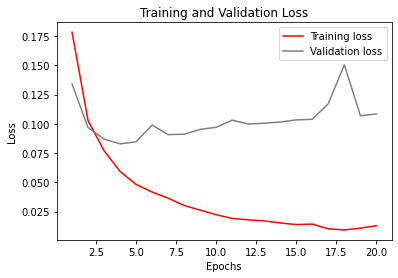

In [11]:
# PLOTTING THE TRAINING AND VALIDATION LOSS
import matplotlib.pyplot as plt
Hist_dict = history.history
loss_values = Hist_dict["loss"]
val_loss_values = Hist_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "grey", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


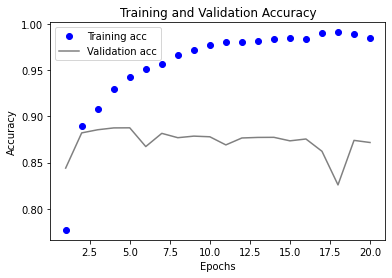

In [12]:
#PLOTTING THE TRAINING AND VALIDATION ACCURACIES
plt.clf()
acc = Hist_dict["accuracy"]
val_acc = Hist_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "grey", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [13]:
#RETRAINING THE MODEL WITH epochs=4 
Model_1 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
Model_1.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
Model_1.fit(x_train, y_train, epochs=4, batch_size=512)
results = Model_1.evaluate(x_test, y_test)
     

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1457 - accuracy: 0.8110
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.0792 - accuracy: 0.9032
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0618 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.8803


In [14]:
Result_1=Model_1.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.8803


**The first model built had an accuracy on the test set of 88.03%**

In [15]:
# USING A TRAINED MODEL TO GENERATE PREDICTIONS ON THE NEW DATA:
Model_1.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.08336519],
       [0.9962984 ],
       [0.77885574],
       ...,
       [0.09231561],
       [0.05729458],
       [0.41178972]], dtype=float32)

**MODEL 2 - Hidden Layer - 1, Nodes - 64**

In [16]:
#MODEL DEFINITION:
Model_2 = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

#COMPLILING THE MODEL:
Model_2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

Hist2 = Model_2.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 1s 36ms/step - loss: 0.1695 - accuracy: 0.7623 - val_loss: 0.1170 - val_accuracy: 0.8710
Epoch 2/50
30/30 [==============================] - 1s 25ms/step - loss: 0.1012 - accuracy: 0.8806 - val_loss: 0.1240 - val_accuracy: 0.8258
Epoch 3/50
30/30 [==============================] - 1s 26ms/step - loss: 0.0786 - accuracy: 0.9067 - val_loss: 0.1210 - val_accuracy: 0.8298
Epoch 4/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0686 - accuracy: 0.9173 - val_loss: 0.0842 - val_accuracy: 0.8871
Epoch 5/50
30/30 [==============================] - 1s 28ms/step - loss: 0.0611 - accuracy: 0.9256 - val_loss: 0.1116 - val_accuracy: 0.8456
Epoch 6/50
30/30 [==============================] - 1s 28ms/step - loss: 0.0545 - accuracy: 0.9353 - val_loss: 0.0837 - val_accuracy: 0.8865
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0499 - accuracy: 0.9419 - val_loss: 0.0866 - val_accuracy: 0.8783
Epoch 8/50
30

In [17]:
Hist_dict_2 = Hist2.history

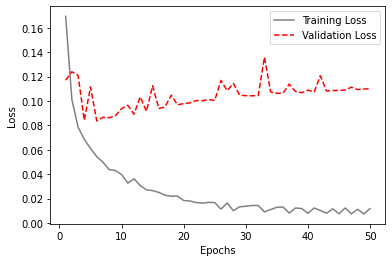

In [18]:
#PLOTTING THE TRAINING AND VALIDATION LOSS:
Loss = Hist_dict_2['loss']
val_loss = Hist_dict_2['val_loss']
epochs = range(1, len(Loss)+1)
plt.plot(epochs, Loss, color= "grey", label= "Training Loss")
plt.plot(epochs, val_loss, color= "red",linestyle= "dashed", label= "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


The validation loss begins to take a spike after the third epoch, so based on the loss graph above, we can determine that "3" is the appropriate number of epochs.



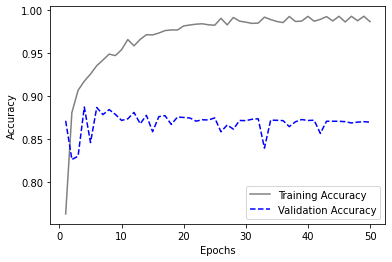

In [19]:
#PLOTTING THE TRAINING AND VALIDATION ACCURACY:
Accuracy = Hist_dict_2['accuracy']
Validation_accuracy = Hist_dict_2['val_accuracy']
epochs = range(1, len(Accuracy)+1)
plt.plot(epochs,Accuracy,color="grey",label="Training Accuracy")
plt.plot(epochs,Validation_accuracy, color= "blue", linestyle="dashed",label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Even from the accuracy graph we can say that the accuracy was highest at epoch=3



In [20]:
#RETRAINING THE MODEL WITH epoch = 3
Model_2 = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

Model_2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_3 = Model_2.fit(x_train,
                       y_train,
                       epochs=3,
                      batch_size=512)

Epoch 1/3
49/49 [==============================] - 1s 18ms/step - loss: 0.1424 - accuracy: 0.8102
Epoch 2/3
49/49 [==============================] - 1s 18ms/step - loss: 0.0855 - accuracy: 0.8920
Epoch 3/3
49/49 [==============================] - 1s 18ms/step - loss: 0.0714 - accuracy: 0.9099


In [21]:
Result_2= Model_2.evaluate(x_test,y_test)


782/782 [==============================] - 2s 2ms/step - loss: 0.0828 - accuracy: 0.8889


**The second model built had an accuracy on the test set of 88.89%.**



In [22]:
# USING A TRAINED MODEL TO GENERATE PREDICTIONS ON THE NEW DATA:
Model_2.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.240855  ],
       [0.9993237 ],
       [0.81981176],
       ...,
       [0.12796728],
       [0.14218387],
       [0.45393446]], dtype=float32)

**MODEL 3 - Hidden Layers - 2, Nodes - 64**

In [23]:
#MODEL DEFINITION:
from tensorflow import keras
from tensorflow.keras import layers
Model_3 = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='tanh'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

#COMPLILING THE MODEL:
Model_3.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

Hist_4 = Model_3.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=256,
                       validation_data=(x_val,y_val))

Epoch 1/50
59/59 [==============================] - 4s 49ms/step - loss: 0.1398 - accuracy: 0.8025 - val_loss: 0.0983 - val_accuracy: 0.8654
Epoch 2/50
59/59 [==============================] - 2s 27ms/step - loss: 0.0803 - accuracy: 0.8944 - val_loss: 0.0829 - val_accuracy: 0.8855
Epoch 3/50
59/59 [==============================] - 1s 18ms/step - loss: 0.0625 - accuracy: 0.9191 - val_loss: 0.0869 - val_accuracy: 0.8845
Epoch 4/50
59/59 [==============================] - 1s 18ms/step - loss: 0.0536 - accuracy: 0.9306 - val_loss: 0.0898 - val_accuracy: 0.8790
Epoch 5/50
59/59 [==============================] - 1s 18ms/step - loss: 0.0451 - accuracy: 0.9449 - val_loss: 0.0998 - val_accuracy: 0.8690
Epoch 6/50
59/59 [==============================] - 1s 18ms/step - loss: 0.0412 - accuracy: 0.9501 - val_loss: 0.0948 - val_accuracy: 0.8798
Epoch 7/50
59/59 [==============================] - 1s 20ms/step - loss: 0.0353 - accuracy: 0.9565 - val_loss: 0.0987 - val_accuracy: 0.8765
Epoch 8/50
59

In [24]:
Hist_dict_4 =Hist_4.history


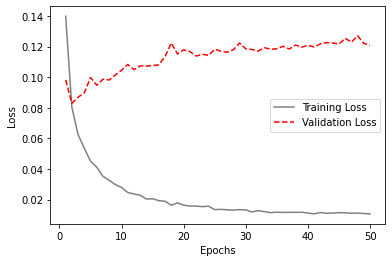

In [25]:
# PLOTTING THE TRAINING AND VALIDATION LOSS:
Loss = Hist_dict_4['loss']
Val_loss = Hist_dict_4['val_loss']
epochs = range(1, len(Loss)+1)
plt.plot(epochs,Loss,color='grey',label='Training Loss')
plt.plot(epochs,Val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The validation loss begins to take a spike after the third epoch, so based on the loss graph above, we can determine that "3" is the appropriate number of epochs.

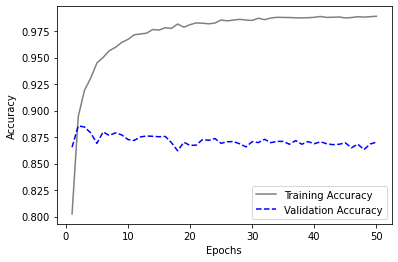

In [26]:
# PLOTTING THE TRAINING AND VALIDATION ACCURACY:
Accuracy = Hist_dict_4['accuracy']
Validation_accuracy = Hist_dict_4['val_accuracy']
epochs = range(1, len(Accuracy)+1)
plt.plot(epochs,Accuracy,color="grey",label="Training Accuracy")
plt.plot(epochs,Validation_accuracy, color= "blue", linestyle="dashed",label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the third epoch.

In [27]:
# RETRAINING THE MODEL WITH epoch = 3
from tensorflow import keras
from tensorflow.keras import layers

Model_3 = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

Model_3.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_4 = Model_3.fit(x_train,
                       y_train,
                       epochs=3,
                      batch_size=256)


Epoch 1/3
98/98 [==============================] - 2s 12ms/step - loss: 0.1208 - accuracy: 0.8397
Epoch 2/3
98/98 [==============================] - 1s 12ms/step - loss: 0.0721 - accuracy: 0.9080
Epoch 3/3
98/98 [==============================] - 1s 12ms/step - loss: 0.0601 - accuracy: 0.9229


In [28]:
Result_3 = Model_3.evaluate(x_test,y_test)


782/782 [==============================] - 2s 2ms/step - loss: 0.1239 - accuracy: 0.8350


**The third model built had an accuracy on the test set of 83.50%**



In [29]:
# USING A TRAINED MODEL TO GENERATE PREDICTIONS ON THE NEW DATA:
Model_3.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.264363  ],
       [0.99998313],
       [0.99819505],
       ...,
       [0.2943394 ],
       [0.14708231],
       [0.8774505 ]], dtype=float32)

**MODEL 4: Hidden Layers - 3, Nodes- 64**

In [30]:
#MODEL DEFINITION:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model_4 = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

##COMPLILING THE MODEL:
model_4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_5 = model_4.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data = (x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 40ms/step - loss: 0.7578 - accuracy: 0.7413 - val_loss: 0.5894 - val_accuracy: 0.8393
Epoch 2/50
30/30 [==============================] - 1s 26ms/step - loss: 0.5087 - accuracy: 0.8798 - val_loss: 0.5153 - val_accuracy: 0.8601
Epoch 3/50
30/30 [==============================] - 1s 26ms/step - loss: 0.4126 - accuracy: 0.9052 - val_loss: 0.4392 - val_accuracy: 0.8878
Epoch 4/50
30/30 [==============================] - 1s 27ms/step - loss: 0.3650 - accuracy: 0.9205 - val_loss: 0.4266 - val_accuracy: 0.8870
Epoch 5/50
30/30 [==============================] - 1s 25ms/step - loss: 0.3291 - accuracy: 0.9308 - val_loss: 0.4281 - val_accuracy: 0.8844
Epoch 6/50
30/30 [==============================] - 1s 26ms/step - loss: 0.2893 - accuracy: 0.9455 - val_loss: 0.4298 - val_accuracy: 0.8816
Epoch 7/50
30/30 [==============================] - 1s 26ms/step - loss: 0.2603 - accuracy: 0.9543 - val_loss: 0.4516 - val_accuracy: 0.8809
Epoch 8/50
30

In [31]:
Hist_dict_5 = history_5.history

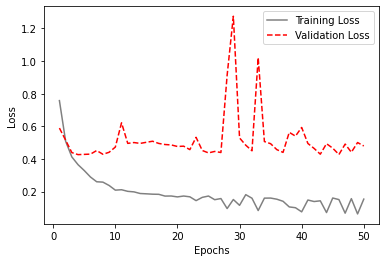

In [32]:
#PLOTTING THE TRAINING AND VALIDATION ACCURACY:

loss = Hist_dict_5['loss']
val_loss = Hist_dict_5['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss begins to take a spike after the third epoch, so based on the loss graph above, we can determine that "3" is the appropriate number of epochs

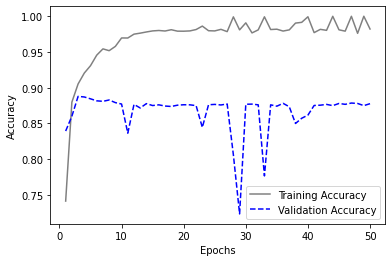

In [33]:
#PLOTTING THE TRAINING AND VALIDATION ACCURACY:
accuracy = Hist_dict_5['accuracy']
val_accuracy = Hist_dict_5['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the third epoch.

In [34]:
#RETRAINING THE MODEL WITH epoch=3
model_4 = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model_4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_5 = model_4.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)

Epoch 1/3
49/49 [==============================] - 2s 23ms/step - loss: 0.6756 - accuracy: 0.7810
Epoch 2/3
49/49 [==============================] - 1s 22ms/step - loss: 0.4475 - accuracy: 0.8902
Epoch 3/3
49/49 [==============================] - 1s 20ms/step - loss: 0.3636 - accuracy: 0.9151


In [35]:
Result_4= model_4.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4109 - accuracy: 0.8872


**The Fourth model built had an accuracy on the test set of 88.72%.**

In [36]:
# USING A TRAINED MODEL TO GENERATE PREDICTIONS ON THE NEW DATA:
model_4.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.16965552],
       [0.99858856],
       [0.8481492 ],
       ...,
       [0.06764711],
       [0.05718164],
       [0.47982943]], dtype=float32)

**MODEL 5: Hidden Layer 3, Nodes - 16**

In [37]:
#MODEL DEFINITION:
model_5 = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

#COMPLING THE MODEL:
model_5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_6 = model_5.fit(partial_x_train,
                       partial_y_train,
                       epochs=35,
                       batch_size=256,
                       validation_data=(x_val,y_val))

Epoch 1/35
59/59 [==============================] - 2s 21ms/step - loss: 0.6073 - accuracy: 0.6694 - val_loss: 0.4485 - val_accuracy: 0.8547
Epoch 2/35
59/59 [==============================] - 1s 11ms/step - loss: 0.4474 - accuracy: 0.8111 - val_loss: 0.3389 - val_accuracy: 0.8770
Epoch 3/35
59/59 [==============================] - 1s 13ms/step - loss: 0.3561 - accuracy: 0.8663 - val_loss: 0.2948 - val_accuracy: 0.8853
Epoch 4/35
59/59 [==============================] - 1s 12ms/step - loss: 0.2965 - accuracy: 0.8929 - val_loss: 0.2753 - val_accuracy: 0.8885
Epoch 5/35
59/59 [==============================] - 1s 11ms/step - loss: 0.2557 - accuracy: 0.9113 - val_loss: 0.2772 - val_accuracy: 0.8879
Epoch 6/35
59/59 [==============================] - 1s 15ms/step - loss: 0.2179 - accuracy: 0.9278 - val_loss: 0.2914 - val_accuracy: 0.8865
Epoch 7/35
59/59 [==============================] - 1s 10ms/step - loss: 0.1995 - accuracy: 0.9328 - val_loss: 0.2981 - val_accuracy: 0.8853
Epoch 8/35
59

In [38]:
Hist_dict_6 =history_6.history

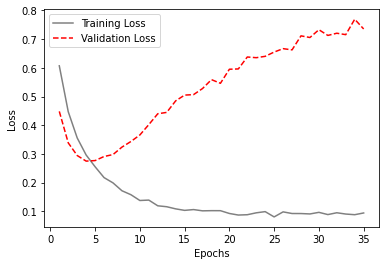

In [39]:
#PLOTTING THE TRAINING AND VALIDATION ACCURACY:
loss = Hist_dict_6['loss']
val_loss = Hist_dict_6['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss begins to take a spike after the third epoch, so based on the loss graph above, we can determine that "3" is the appropriate number of epochs

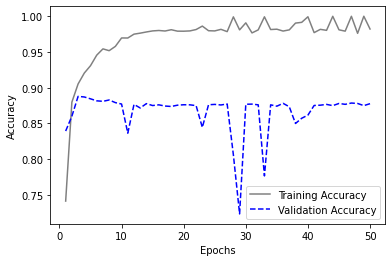

In [40]:
#PLOTTING THE TRAINING AND VALIDATION ACCURACY:
accuracy = Hist_dict_5['accuracy']
val_accuracy = Hist_dict_5['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
#RETRAINING THE MODEL WITH epoch=3
model_5 = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model_5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history5 = model_5.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=256)

Epoch 1/3
98/98 [==============================] - 1s 7ms/step - loss: 0.5664 - accuracy: 0.7128
Epoch 2/3
98/98 [==============================] - 1s 8ms/step - loss: 0.3986 - accuracy: 0.8505
Epoch 3/3
98/98 [==============================] - 1s 8ms/step - loss: 0.3145 - accuracy: 0.8870


In [42]:
Result_5= model_5.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2916 - accuracy: 0.8810


**The Fifth model built had an accuracy on the test set of 88.10%**

In [43]:
# USING A TRAINED MODEL TO GENERATE PREDICTIONS ON THE NEW DATA:
model_5.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.15788795],
       [0.9995093 ],
       [0.9143709 ],
       ...,
       [0.09689429],
       [0.12464382],
       [0.30330494]], dtype=float32)

**MODEL 6 : Hidden Layer- 1, Nodes- 32**

In [44]:
#MODEL DEFINITION:
model_6 = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

#COMPILING THE MODEL
model_6.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history_7 = model_6.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 1s 31ms/step - loss: 0.1605 - accuracy: 0.7934 - val_loss: 0.1128 - val_accuracy: 0.8679
Epoch 2/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0851 - accuracy: 0.9086 - val_loss: 0.0925 - val_accuracy: 0.8868
Epoch 3/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0634 - accuracy: 0.9327 - val_loss: 0.0861 - val_accuracy: 0.8904
Epoch 4/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0500 - accuracy: 0.9510 - val_loss: 0.0835 - val_accuracy: 0.8897
Epoch 5/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0411 - accuracy: 0.9629 - val_loss: 0.0834 - val_accuracy: 0.8875
Epoch 6/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0342 - accuracy: 0.9717 - val_loss: 0.0839 - val_accuracy: 0.8866
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0287 - accuracy: 0.9781 - val_loss: 0.0849 - val_accuracy: 0.8834
Epoch 8/50
30

In [45]:
hist_dict_7=history_7.history

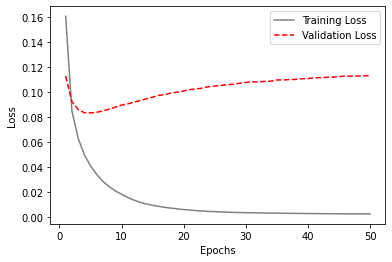

In [46]:
#PLOTTING TH TRAINING AND VALIDATION LOSS:
loss = hist_dict_7['loss']
val_loss = hist_dict_7['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can determine the correct number of epochs to be "5" from the loss graph shown above because the validation loss begins to spike after the fifth epoch

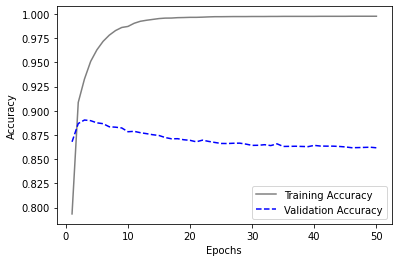

In [47]:
#PLOTTING TH TRAINING AND VALIDATION ACCURACY:
accuracy = hist_dict_7['accuracy']
val_accuracy = hist_dict_7['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the fifth epoch.

In [48]:
#RETRAINING THE MODEL WITH epoch=5
model_6 = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model_6.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history7 = model_6.fit(x_train,
                       y_train,
                       epochs=5,
                       batch_size=256)

Epoch 1/5
98/98 [==============================] - 2s 10ms/step - loss: 0.1210 - accuracy: 0.8508
Epoch 2/5
98/98 [==============================] - 1s 9ms/step - loss: 0.0643 - accuracy: 0.9208
Epoch 3/5
98/98 [==============================] - 1s 8ms/step - loss: 0.0486 - accuracy: 0.9435
Epoch 4/5
98/98 [==============================] - 1s 8ms/step - loss: 0.0395 - accuracy: 0.9559
Epoch 5/5
98/98 [==============================] - 1s 9ms/step - loss: 0.0329 - accuracy: 0.9650


In [49]:
result_6= model_6.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.0969 - accuracy: 0.8706


:**The Sixth model built had an accuracy on the test set of 87.06%**

In [50]:
# USING A TRAINED MODEL TO GENERATE PREDICTIONS ON THE NEW DATA:
model_6.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.05909999],
       [0.9999382 ],
       [0.36853468],
       ...,
       [0.12880376],
       [0.03066854],
       [0.62575835]], dtype=float32)

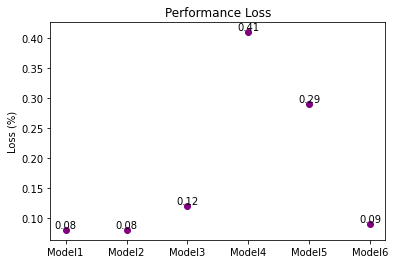

In [53]:
#Evaluating the performance of six different neural network models trained on the IMDB dataset 
loss_dict = {'Model1': 0.08, 'Model2': 0.08, 'Model3': 0.12, 'Model4': 0.41,
             'Model5': 0.29, 'Model6': 0.09}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='purple')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()
     

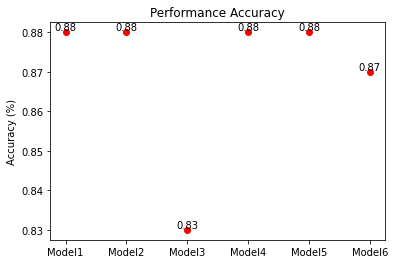

In [54]:
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model1': 0.88, 'Model2': 0.88, 'Model3': 0.83, 'Model4': 0.88,
            'Model5': 0.88, 'Model6': 0.87}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='red')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()